In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_base_dir = '../../../datasets/Movielens/'
data_dir2 = data_base_dir + 'Movielens Latest/ml-latest/'
data_dir = data_base_dir + 'ml-20m/'

genome_scores = data_dir + 'genome-scores.csv'
genome_tags = data_dir + 'genome-tags.csv'
movies = data_dir + 'movies.csv'
ratings = data_dir + 'ratings.csv'
tags = data_dir + 'tags.csv'

genome_scores_df = pd.read_csv(genome_scores)
genome_score_movies = genome_scores_df['movieId'].unique()
genome_scores_df = genome_scores_df.pivot(index='movieId', columns='tagId', values='relevance')

ratings_df = pd.read_csv(ratings, usecols=range(3), dtype={'userId':np.int64, 'movieId':np.int64, 'rating':np.float64}, low_memory=False)
ratings_df = ratings_df[ratings_df['movieId'].isin(genome_score_movies)]

In [6]:
from sklearn.preprocessing import StandardScaler

# features = dfz.columns[2:] # we are not including Unnamed: 0  column for Principal Component Analysis
# Separating out the features
# x = dfz.loc[:, features].values
x = genome_scores_df.values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


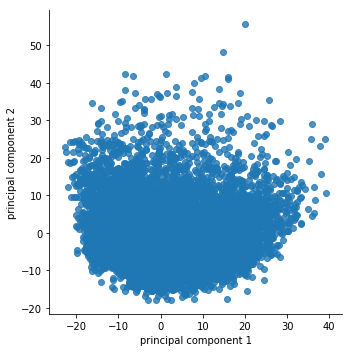

In [53]:
import seaborn as sns
sns.lmplot( x="principal component 1", y="principal component 2", data=principalDf, fit_reg=False, legend=False)


pca = PCA(n_components=600)

pca.fit(x)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)



[10.75 16.55 20.76 24.   26.67 29.07 31.25 33.13 34.82 36.26 37.68 38.87
 39.98 41.08 42.1  43.07 43.98 44.85 45.64 46.42 47.14 47.81 48.43 49.03
 49.59 50.12 50.64 51.14 51.62 52.09 52.54 52.97 53.39 53.8  54.2  54.58
 54.96 55.32 55.67 56.   56.33 56.66 56.98 57.29 57.59 57.89 58.18 58.46
 58.74 59.01 59.28 59.54 59.8  60.05 60.29 60.53 60.76 60.99 61.22 61.44
 61.66 61.87 62.08 62.29 62.49 62.69 62.89 63.09 63.28 63.47 63.66 63.85
 64.04 64.22 64.4  64.58 64.76 64.93 65.1  65.27 65.44 65.6  65.76 65.92
 66.08 66.24 66.4  66.56 66.71 66.86 67.01 67.16 67.31 67.46 67.6  67.74
 67.88 68.02 68.16 68.3  68.44 68.58 68.71 68.84 68.97 69.1  69.23 69.36
 69.49 69.62 69.75 69.87 69.99 70.11 70.23 70.35 70.47 70.59 70.71 70.83
 70.95 71.06 71.17 71.28 71.39 71.5  71.61 71.72 71.83 71.94 72.05 72.16
 72.27 72.37 72.47 72.57 72.67 72.77 72.87 72.97 73.07 73.17 73.27 73.37
 73.47 73.57 73.67 73.77 73.87 73.96 74.05 74.14 74.23 74.32 74.41 74.5
 74.59 74.68 74.77 74.86 74.95 75.04 75.13 75.22 75.

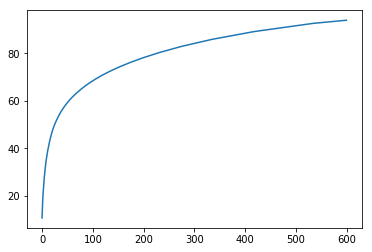

In [54]:
print (var1)
plt.plot(var1)

In [79]:
# np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)
var1.mean()

79.92471666666668